# Redes Neuronales
## TP1

Entrene una red de Hopfield ‘82 con las imágenes binarias disponibles en el campus.
1. Verifique si la red aprendió las imágenes enseñadas.
2. Evalúe la evolución de la red al presentarle versiones alteradas de las imágenes aprendidas: agregado de ruido, elementos borrados o agregados.
3. Evalúe la existencia de estados espurios en la red: patrones inversos y combinaciones de un número impar de patrones. (Ver Spurious States, en la sección 2.2, Hertz, Krogh & Palmer, pág. 24).
4. Realice un entrenamiento con las 6 imágenes disponibles. ¿Es capaz la red de aprender todas las imágenes? Explique.

In [49]:
# primero importamos numpy y algo para leer imágenes

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [50]:
# necesito paths a las imagenes,vienen de un repo clonado localmente 
path1 = 'C:\\Users\\ignac\\Documents\\GitHub\\Redes-neuronales\\imagenes_tp1\\paloma.bmp'
path2 = 'C:\\Users\\ignac\\Documents\\GitHub\\Redes-neuronales\\imagenes_tp1\\panda.bmp' # 50*50
path3 = 'C:\\Users\\ignac\\Documents\\GitHub\\Redes-neuronales\\imagenes_tp1\\perro.bmp' #50*50
path4= 'C:\\Users\\ignac\\Documents\\GitHub\\Redes-neuronales\\imagenes_tp1\\quijote.bmp'
path5= 'C:\\Users\\ignac\\Documents\\GitHub\\Redes-neuronales\\imagenes_tp1\\torero.bmp'
path6= 'C:\\Users\\ignac\\Documents\\GitHub\\Redes-neuronales\\imagenes_tp1\\v.bmp' #50*50


In [51]:
def imgPath_to_vector(paths):
    """La idea es tomar una lista de paths ygenerar una matriz cuyas columnas sean los pixeles de las imagenes"""
    list = []
    for path in paths:
        img = Image.open(path) 
        vector_img = np.array(img).astype(np.int8)
        forma = np.shape(vector_img)
        vector_img = vector_img.ravel()#ideal del profe, tratar las imagenes como vectores columna
        list.append(vector_img *2 -1) # acá lo ajusto para ir de (0,1)->(-1,1)
    return np.asarray(list).transpose(), list,forma

flattened_images1, lista_img1,forma1 = imgPath_to_vector([path2,path3,path6]) # tenemos las imagenes 
flattened_images2, lista_img,forma2 = imgPath_to_vector([path1,path4,path5])

In [52]:
# ahora sabemos que hay tantas neuronas como valores en los vectores columna que conforman la matriz de datos "flattened_images1"
# W es una matriz cuadrada de filas y columnas de igual tamaño a la cantidad de neuronas

def calcular_matriz_W(flattened_images,nu=1):
    filas = np.shape(flattened_images)[0] # cant de neuronas
    columnas = np.shape(flattened_images)[1] # cant de imagenes (vectores)
    W_matrix = np.zeros([filas,filas]) # creo la matriz W,de pesos

    for i in range(columnas): # itera 1 vez por cada pattern
        delta_W = nu * np.asmatrix(flattened_images[:,i]).T @ np.asmatrix(flattened_images[:,i])
        W_matrix = W_matrix + delta_W

    W_matrix = W_matrix - np.diag(np.diag(W_matrix)) # le saco la diagona,lo de diag(diag) está en lapágina de numpy
    return W_matrix

In [53]:
W_matrix = calcular_matriz_W(flattened_images1)

In [54]:
def correr_red(W, patron, iters=5):
    """PAra dejar que la red vaya a algún estado desde el patron"""
    estado = patron.copy() # copia el patron como estado inicial de la red
    for _ in range(iters): # itera n veces
        estado = np.sign(W @ estado) # porahora calcula todas juntas, aunque eso puede afectar convergencia?-itera sobre los estados
    return estado

In [ ]:
def chequear_aprendizaje(W_matrix,flattened_images):
    """Estafunción solo recibe patrones y devuelve a donde se fue la red 5 iteraciones despues"""
    columnas = np.shape(flattened_images)[1] # cant de imagenes (vectores)
    lista_recordada = [] #para guardar lo que recuerda

    for i in range(columnas): # itera 1 vez por cada imagen que se aprendió
        original = np.asmatrix(flattened_images[:, i]).T
        res = correr_red(W_matrix, original)
        lista_recordada.append(res)

        if np.array_equal(original, res):# avisamos si las imágenes se recordaron bien o no
            print(f"La imagen {i} fue recordada correctamente.")
        else:
            print(f"La imagen {i} NO fue recordada correctamente.")

    return lista_recordada

In [56]:
memoria1 = chequear_aprendizaje(W_matrix, flattened_images1)

La imagen 0 fue recordada correctamente.
La imagen 1 fue recordada correctamente.
La imagen 2 fue recordada correctamente.


In [57]:
# idem con el 2do set de imagenes
W_matrix2 = calcular_matriz_W(flattened_images2)
memoria2 = chequear_aprendizaje(W_matrix2, flattened_images2)


La imagen 0 fue recordada correctamente.
La imagen 1 fue recordada correctamente.
La imagen 2 fue recordada correctamente.


In [58]:
# ahora tocaría poner la imagen real al lado de la memoria recuperada
def mostrar_resultados(memoria, imagenes,forma):
    alto, ancho = forma[0], forma[1]
    for i in range(len(memoria)):
        plt.subplot(2, len(memoria), i + 1)
        plt.imshow(imagenes[:, i].reshape(alto, ancho), cmap='gray')
        plt.axis('off')
        plt.subplot(2, len(memoria), i + 1 + len(memoria))
        plt.imshow(memoria[i].reshape(alto, ancho), cmap='gray')
        plt.axis('off')
    plt.show()

    
    

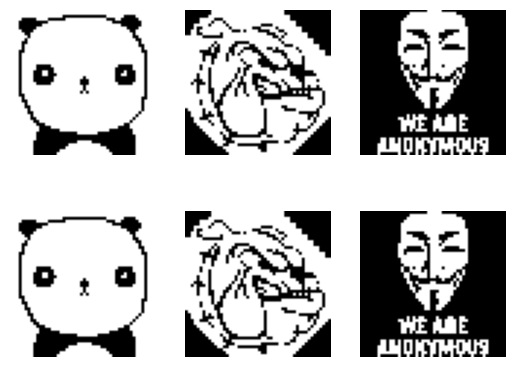

In [59]:
mostrar_resultados(memoria1, flattened_images1,forma1)

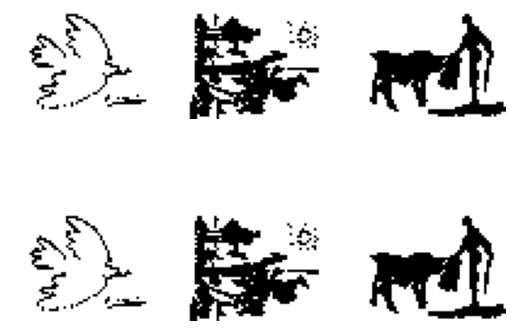

In [60]:
mostrar_resultados(memoria2, flattened_images2,forma2)